# Ising Model - Metropolis-Hastings Algorithm

Metropolis-Hastings algorithm a sampling algorithm. It's typically used with systems with large degrees of freedom (i.e. high dimensionality of sampling space). Systems that make direct sampling of probability distrobutions or or have complicated probability distribution functions can make direct sampling difficult and in many cases impossible or impractial.</br>

The Metropolis-Hastings algorithm is an example of a <b>Markov Chain Monte Carlo </b> algorithm [1]. The 'chain' term arises from the fact that in order to get the next sample/step, we only need to consider the current sample. This is a Monte Carlo algorithm since it generates a random sample as a means of computing difficult integrals numerically.
In the case of probability distributions, the integrals we may want to compute are the expected value, mean, median, mode, and other statistical values.</br>

The central concept for the Metropolis-Hastings algorithim comes from the <b>transition probability</b> $Q(x \rightarrow x')$. This distribution which is used to introduce a candidate next step in the Markov Chain given the current sample or state of the system.  Once the candidate step is computed, an acceptance criteria is introduced in the form of <b>$\alpha$</b>, called an acceptance probability.</br>

$\alpha = min\left(1, \frac{P\left(x'\right)}{P\left(x\right)} \cdot \frac{Q\left(x' \rightarrow x\right)}{Q\left(x \rightarrow x'\right)}\right)$

Where P(x) is the target distribution from which we would like to sample from.</br>

in other words $\alpha$ determines whether or not we accept the new sample or if we reject the candidate and stay put</br>


<b>When the transition probability $Q(x \rightarrow x')$ is symmetric</b>, we get $Q(x \rightarrow x') = Q(x' \rightarrow x)$ and this implies $ \frac{Q\left(x' \rightarrow x\right)}{Q\left(x \rightarrow x'\right)} = 1$, and  $\therefore \alpha =1$:</br>

$\alpha = min\left(1, \frac{P\left(x'\right)}{P\left(x\right)}\right)$                  

In this case, the <b>Metropolis-Hastings would become just Metropolis</b>. So, Metropolis algorithm is the special case of Metropolis-Hastings algorithm where the transition distribution is symmetric. Let's take a look at an example using a Gaussian distribution. In the script below we ignore the min(1, x) term in the $\alpha$ calculations and instead compute $\frac{P(x')}{P(x)}$ directly


When implementing this in python, we ignore the min(1, x) term results from our calculations of $\alpha$, we instead just calculate $\frac{P(x')}{P(x)}$, as we're only concerned with whether or not the ratio is greater than a randomly generated value on the interval \[0, 1\]. In the case $\frac{P(x')}{P(x)} > 1$, the acceptance criteria always is satisfied same as the case when $\frac{P(x')}{P(x)}$= 1, calculated from the min(1, x) term.


For the circle centered in (1, 2), and with radius = 4.


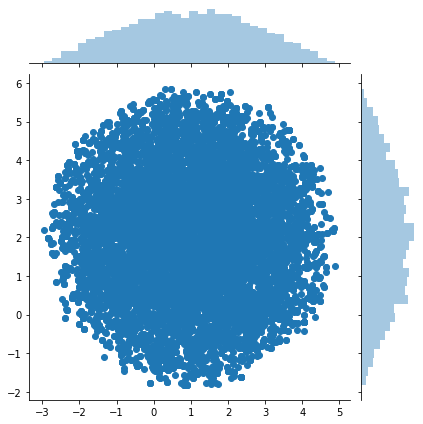

In [37]:
import numpy as np
import scipy.stats as st
import seaborn as sns


mus = np.array([5, 5]) ## x and y mean values
sigmas = np.array([[1, .9], [.9, 1]]) ## sigma/covariance matrix


def circle(xcoord, ycoord): # circle centered in (1, 2) with radius of 4.
    return (xcoord-1)**2 + (ycoord-2)**2 - 4**2


def pgauss(x, y):
    return st.multivariate_normal.pdf([x, y], mean=mus, cov=sigmas)


def metropolis_hastings(p, iter=1000):
    x, y = 0., 0.
    samples = np.zeros((iter, 2))

    for i in range(iter):
        x_star, y_star = np.array([x, y]) + np.random.normal(size=2)
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star
        samples[i] = np.array([x, y])
    print("\nFor the circle centered in (1, 2), and with radius = 4.")
    return samples


samples = metropolis_hastings(circle, iter=10000)
sns.jointplot(samples[:, 0], samples[:, 1])

This seems to give us what we'd expected, something resembling a circle